###  Final Project New Role Data Scientist

### A. Getting Started

##### 1. Project description summary
For a company that sells insurance for group travel develop a retention model. <br/>
The internal data is (a) Sales, (b) Finance and (c) CRM. <br/>
The external data consists of twitter posts.


In [50]:
##### 2. Import needed packages
import pandas as pd
import os as os
import datetime as dt
wd = os.getcwd()
print(wd)

d:\Projects\Jupiter\venv\final proj


##### 3. Available Data 



In [52]:
sales = pd.read_csv(wd + "\dataset\\sales_model.csv")
finance = pd.read_csv(wd + "\dataset\\finance_model.csv")
crm = pd.read_csv(wd + "\dataset\\crm_model.csv")
twitter = pd.read_csv(wd + "\dataset\\tw_data_clean.csv")

Import the datasets

Inspect the datasets

In [53]:
#to see details of a dataset uncomment some of the following lines:

#sales.dtypes
print(sales.shape) # output: (4200, 32)
#sales.iloc[:,0:15].head(10)
#sales.iloc[:,16:32].head(10)
#finance.dtypes
print(finance.shape) # output: (4200, 9) 
#finance.head(3)
#crm.dtypes
print(crm.shape) # output: (4200, 16)
#crm.head(3)
#twitter.dtypes
#twitter.head(3)
#twitter.shape # output: (12837, 2)

(4153, 24)
(4151, 12)
(4148, 20)


##### 4. Merge Datasets
We clean up the ID to be able to merge the data. The twitter dataset has multiple texts per ID so we will merge this after text analytics.

The format of the IDs is as follows. The actual ID is hidden within. using regular expressions we extract the common IDs as ID2

In [54]:
print(sales.ID_SALES[0])
print(finance.ID_FINANCE[0])
print(crm.ID_CRM[100])
print(twitter.ID_SALES[0])

CC1387A
1389
01439P
CC1387A


Hidden IDs are *cursive*  <br/>

HG-*449*-40686  <br/>
*3124*-40201  <br/>
LISTED-*1553*  <br/>
HD-*668*-40614  <br/>

In [55]:
sales['ID'] = sales.ID_SALES.str.extract(r'(\d+)')
finance['ID'] = finance.ID_FINANCE.str.extract(r'(\d+)')
crm['ID'] = crm.ID_CRM.str.extract(r'(\d+)')
twitter['ID'] = twitter.ID_SALES.str.extract(r'(\d+)')
sales['ID']

0       1387
1        139
2       1600
3       1701
4       1773
        ... 
4148      60
4149     809
4150     925
4151     928
4152     960
Name: ID, Length: 4153, dtype: object

The new IDs are unique as should be. Only for the twitter IDs there are multiple texts per ID (number of unique values is smaller then the number of rows of the twitter dataset).

In [56]:
print(sales.ID.nunique())
print(finance.ID.nunique())
print(crm.ID.nunique())
print(twitter.ID.nunique())

4153
4151
4145
4148


Now we merge the datasets on the new ID also with twitter sentiment analysis data file

In [57]:
merge1 = sales.merge(finance, on = 'ID', how = 'inner')
merge2 = merge1.merge(crm, on = 'ID', how = 'inner')
merge2 = merge2.merge(twitter, on ='ID', how = 'inner')
merge2.shape
merge2['ID']

0       1016
1        101
2       1029
3       1036
4       1039
        ... 
3090      60
3091     809
3092     925
3093     928
3094     960
Name: ID, Length: 3095, dtype: object

Resulting in the following dataset (after dropping the unneccesary IDs)

In [58]:
data_sel = merge2.drop(columns=['ID_SALES_x', 'ID_SALES_y', 'ID_CRM', 'ID_FINANCE','text'])

In [59]:
data_sel.to_csv("merge_model.csv", index = True)
data_sel.dtypes

Program_Code                       object
From_Grade                        float64
To_Grade                          float64
Group_State                        object
Days                                int64
Travel_Type                        object
Departure_Date                     object
Return_Date                        object
Early_RPL                          object
Latest_RPL                         object
Cancelled_Pax                       int64
Total_Discount_Pax                  int64
Initial_System_Date                object
SPR_Product_Type                   object
FPP                                 int64
Total_Pax                           int64
DepartureMonth                     object
GroupGradeTypeLow                  object
GroupGradeTypeHigh                 object
GroupGradeType                     object
MajorProgramCode                   object
FPP_to_School_enrollment           object
Retained                            int64
ID                                

### B. Data Cleaning

We check the data for columns with missing values

In [60]:
data_sel.loc[:,data_sel.isna().any() == True].dtypes
#data_sel.to_csv('data_sel.csv')

From_Grade                        float64
To_Grade                          float64
Early_RPL                          object
Latest_RPL                         object
Initial_System_Date                object
FPP_to_School_enrollment           object
Special_Pay                        object
FirstMeeting                       object
LastMeeting                        object
DifferenceTraveltoFirstMeeting    float64
DifferenceTraveltoLastMeeting     float64
SchoolSizeIndicator                object
dtype: object

##### 1.Transform datatype

In [61]:
# Transform dates in date format
data_sel[['Departure_Date',
          'Return_Date',
          "Early_RPL",
          "Latest_RPL",
          'Initial_System_Date',
          'Deposit_Date',
           'FirstMeeting',
           'LastMeeting']] = data_sel[['Departure_Date',
          'Return_Date',
          "Early_RPL",
          "Latest_RPL",
          'Initial_System_Date',
          'Deposit_Date',
           'FirstMeeting',
           'LastMeeting']].apply(pd.to_datetime)
print(str(data_sel['FPP_to_School_enrollment'].dtype))
if(str(data_sel['FPP_to_PAX'].dtype)== 'object'):
    data_sel['FPP_to_PAX'] = data_sel['FPP_to_PAX'].fillna(value='0')
    data_sel['FPP_to_PAX'] = data_sel['FPP_to_PAX'].apply(lambda x: str(x.replace(',','.'))).astype(float) 
if(str(data_sel['FPP_to_School_enrollment'].dtype)== 'object'):
    data_sel['FPP_to_School_enrollment'] = data_sel['FPP_to_School_enrollment'].fillna(value='0')
    data_sel['FPP_to_School_enrollment'] = data_sel['FPP_to_School_enrollment'].apply(lambda x: str(x.replace(',','.'))).astype(float) 
if(str(data_sel['FRP_Take_up_percent_'].dtype)== 'object'):
    data_sel['FRP_Take_up_percent_'] = data_sel['FRP_Take_up_percent_'].fillna(value='0')
    data_sel['FRP_Take_up_percent_'] = data_sel['FRP_Take_up_percent_'].apply(lambda x: str(x.replace(',','.'))).astype(float) 
if(str(data_sel['EZ_Pay_Take_Up_Rate'].dtype)== 'object'):
    data_sel['EZ_Pay_Take_Up_Rate'] = data_sel['EZ_Pay_Take_Up_Rate'].fillna(value='0')
    data_sel['EZ_Pay_Take_Up_Rate'] = data_sel['EZ_Pay_Take_Up_Rate'].apply(lambda x: str(x.replace(',','.'))).astype(float) 

#data_sel.to_csv('data_sel.csv')

object


##### 1. Method
We check the amount of missing values, if the amount of missing values is small, we replace them with a mean/median/most frequent value. If the amount of missing values is large we drop the column.

In [62]:
for i in data_sel.loc[:,data_sel.isna().any() == True].columns:
    print(i)
    print( data_sel[i].value_counts(dropna = False) )

From_Grade
6.0     574
7.0     539
8.0     518
9.0     487
10.0    312
5.0     246
NaN     161
4.0     100
3.0      56
11.0     31
12.0     30
2.0      30
13.0      8
14.0      2
1.0       1
Name: From_Grade, dtype: int64
To_Grade
7.0     525
8.0     514
9.0     504
10.0    500
6.0     498
NaN     195
11.0     70
12.0     63
5.0      57
4.0      44
3.0      43
13.0     35
14.0     25
2.0      22
Name: To_Grade, dtype: int64
Early_RPL
NaT           869
2018-03-12     40
2018-03-29     28
2018-04-07     27
2018-04-03     27
             ... 
2018-11-03      1
2017-10-30      1
2017-04-14      1
2017-09-30      1
2017-10-26      1
Name: Early_RPL, Length: 212, dtype: int64
Latest_RPL
2018-08-31    66
2018-09-06    64
2018-08-28    63
2018-08-25    59
2018-09-03    59
              ..
2017-11-10     1
2018-04-28     1
2018-12-17     1
2018-02-14     1
2018-12-27     1
Name: Latest_RPL, Length: 303, dtype: int64
Initial_System_Date
2018-02-25    30
2018-04-03    28
2018-03-14    28
2018-03-

We checked the histogram to see if it is ok to take the mean/median

array([[<AxesSubplot:title={'center':'From_Grade'}>,
        <AxesSubplot:title={'center':'To_Grade'}>,
        <AxesSubplot:title={'center':'Early_RPL'}>],
       [<AxesSubplot:title={'center':'Latest_RPL'}>,
        <AxesSubplot:title={'center':'Initial_System_Date'}>,
        <AxesSubplot:title={'center':'FirstMeeting'}>],
       [<AxesSubplot:title={'center':'LastMeeting'}>,
        <AxesSubplot:title={'center':'DifferenceTraveltoFirstMeeting'}>,
        <AxesSubplot:title={'center':'DifferenceTraveltoLastMeeting'}>]],
      dtype=object)

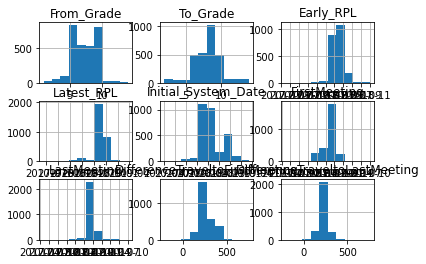

In [63]:
data_sel.loc[:,data_sel.isna().any() == True].hist()

In [64]:
data_sel['SchoolSizeIndicator'].describe()

count     3076
unique       4
top          L
freq       957
Name: SchoolSizeIndicator, dtype: object

In [65]:
data_sel['From_Grade'] = data_sel['From_Grade'].fillna(data_sel['From_Grade'].median())
data_sel['To_Grade'] = data_sel['To_Grade'].fillna(data_sel['To_Grade'].median())
data_sel['SchoolSizeIndicator'] = data_sel['SchoolSizeIndicator'].fillna(data_sel['SchoolSizeIndicator'].mode()[0])
data_sel["DifferenceTraveltoFirstMeeting"] = data_sel["DifferenceTraveltoFirstMeeting"].fillna(data_sel["DifferenceTraveltoFirstMeeting"].median())
data_sel["DifferenceTraveltoLastMeeting"] = data_sel["DifferenceTraveltoLastMeeting"].fillna(data_sel["DifferenceTraveltoLastMeeting"].median())

The following columns were threated differently:

We drop the column Special_Pay (huge amount of missing values), and the unneccesary date columns with a lot of missing or not consistent values

In [66]:
data_sel = data_sel.drop(columns=['Special_Pay'])
data_sel = data_sel.drop(columns = ['FirstMeeting', 'LastMeeting', 'Latest_RPL', 'Early_RPL', 'Initial_System_Date','DepartureMonth','GroupGradeTypeLow','GroupGradeType','SchoolGradeType'])
data_sel = data_sel[data_sel.DifferenceTraveltoLastMeeting>=0]
data_sel = data_sel[data_sel.DifferenceTraveltoLastMeeting>=0]

##### 2.Now we have the cleaned data set without missing values 

In [67]:
data_clean = data_sel.copy()

In [68]:
data_clean.dtypes

Program_Code                              object
From_Grade                               float64
To_Grade                                 float64
Group_State                               object
Days                                       int64
Travel_Type                               object
Departure_Date                    datetime64[ns]
Return_Date                       datetime64[ns]
Cancelled_Pax                              int64
Total_Discount_Pax                         int64
SPR_Product_Type                          object
FPP                                        int64
Total_Pax                                  int64
GroupGradeTypeHigh                        object
MajorProgramCode                          object
FPP_to_School_enrollment                 float64
Retained                                   int64
ID                                        object
Deposit_Date                      datetime64[ns]
Tuition                                    int64
FRP_Active          

In [69]:
data_clean.isna().any()

Program_Code                      False
From_Grade                        False
To_Grade                          False
Group_State                       False
Days                              False
Travel_Type                       False
Departure_Date                    False
Return_Date                       False
Cancelled_Pax                     False
Total_Discount_Pax                False
SPR_Product_Type                  False
FPP                               False
Total_Pax                         False
GroupGradeTypeHigh                False
MajorProgramCode                  False
FPP_to_School_enrollment          False
Retained                          False
ID                                False
Deposit_Date                      False
Tuition                           False
FRP_Active                        False
FRP_Cancelled                     False
FRP_Take_up_percent_              False
EZ_Pay_Take_Up_Rate               False
School_Sponsor                    False


In [70]:
#type(data_clean)
#data_clean.to_csv("clean_model.csv", index = True)

##### 3. categories orthonormalization
Categories must be translated into orthonormal features

In [72]:
import numpy as np
orth = pd.get_dummies(data_clean,columns=['Region'],prefix=['Is_Region'])
orth = pd.get_dummies(orth,columns=['School_Type'],prefix=['Is_School_Type'])
orth = pd.get_dummies(orth,columns=['SPR_Product_Type'],prefix=['Is_SPR_Product_Type'])
orth = pd.get_dummies(orth,columns=['Group_State'],prefix=['Is_Group_State'])
orth = pd.get_dummies(orth,columns=['GroupGradeTypeHigh'],prefix=['Is_GroupGradeTypeHigh'])
orth = pd.get_dummies(orth,columns=['MajorProgramCode'],prefix=['Is_MajorProgramCode'])
orth = pd.get_dummies(orth,columns=['Program_Code'],prefix=['Is_Program_Code'])
orth = pd.get_dummies(orth,columns=['Travel_Type'],prefix=['Is_Travel_Type'])
orth = pd.get_dummies(orth,columns=['SchoolGradeTypeLow'],prefix=['Is_SchoolGradeTypeLow'])
orth = pd.get_dummies(orth,columns=['SchoolGradeTypeHigh'],prefix=['Is_SchoolGradeTypeHigh'])
orth = pd.get_dummies(orth,columns=['SchoolSizeIndicator'],prefix=['Is_SchoolSizeIndicator'])
orth = pd.get_dummies(orth,columns=['MDR_Low_Grade'],prefix=['Is_MDR_Low_Grade'])

orth.to_csv("clean_model_norm.csv", index = True)
orth.dtypes

From_Grade                    float64
To_Grade                      float64
Days                            int64
Departure_Date         datetime64[ns]
Return_Date            datetime64[ns]
                            ...      
Is_MDR_Low_Grade_7              uint8
Is_MDR_Low_Grade_8              uint8
Is_MDR_Low_Grade_9              uint8
Is_MDR_Low_Grade_K              uint8
Is_MDR_Low_Grade_PK             uint8
Length: 156, dtype: object

In [73]:
#remove income_level undefined few rows
orth = orth[orth.Income_Level != 'Z']
orth = orth[orth.Poverty_Code != 'E']
#categorize in ordered category
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
orth['Income_Level'] = labelencoder.fit_transform(orth['Income_Level'])
orth['Poverty_Code'] = labelencoder.fit_transform(orth['Poverty_Code'])
orth.to_csv("clean_model_orthnorm.csv", index = True)

In [75]:
#calculate month of departure and return date and diff from deposit date
orth['Departure_Month'] = pd.DatetimeIndex(orth['Departure_Date']).month
orth['Return_Month'] = pd.DatetimeIndex(orth['Return_Date']).month
orth['Deposit_Days'] = (orth['Departure_Date'] - orth['Deposit_Date']).dt.days 

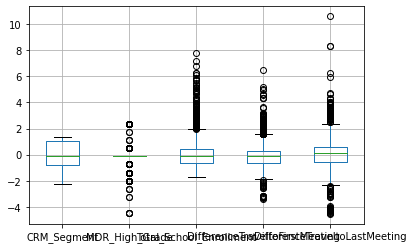

In [76]:
#scale numeric categories to be analyzed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
orth[['Income_Level','Poverty_Code','To_Grade','Days','NumberOfMeetingswithParents']] = scaler.fit_transform(orth[['Income_Level','Poverty_Code','To_Grade','Days','NumberOfMeetingswithParents']])
scaler = StandardScaler()
orth[['FPP','From_Grade','Cancelled_Pax','Total_Discount_Pax','Total_Pax']] = scaler.fit_transform(orth[['FPP','From_Grade','Cancelled_Pax','Total_Discount_Pax','Total_Pax']])
#data_clean.boxplot(column=['FPP','From_Grade','Cancelled_Pax','Total_Discount_Pax','Total_Pax'])
orth[['FPP_to_School_enrollment','Tuition','FRP_Active','FRP_Cancelled','FRP_Take_up_percent_']] = scaler.fit_transform(orth[['FPP_to_School_enrollment','Tuition','FRP_Active','FRP_Cancelled','FRP_Take_up_percent_']])
#data_clean.boxplot(column=['FPP_to_School_enrollment','Tuition','FRP_Active','FRP_Cancelled','FRP_Take_up_percent_'])
orth[['EZ_Pay_Take_Up_Rate','School_Sponsor','SPR_Group_Revenue','FPP_to_PAX','Num_of_Non_FPP_PAX']] = scaler.fit_transform(orth[['EZ_Pay_Take_Up_Rate','School_Sponsor','SPR_Group_Revenue','FPP_to_PAX','Num_of_Non_FPP_PAX']])
#data_clean.boxplot(column=['EZ_Pay_Take_Up_Rate','School_Sponsor','SPR_Group_Revenue','FPP_to_PAX','Num_of_Non_FPP_PAX'])
#NB: 'MDR_Low_Grade' has K,PK? DifferenceTraveltoFirstMeeting <0, DifferenceTraveltoLasttMeeting<0
orth[['CRM_Segment','MDR_High_Grade','Total_School_Enrollment','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','Departure_Month','Return_Month','Deposit_Days']] = scaler.fit_transform(orth[['CRM_Segment','MDR_High_Grade','Total_School_Enrollment','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','Departure_Month','Return_Month','Deposit_Days']])
orth.boxplot(column=['CRM_Segment','MDR_High_Grade','Total_School_Enrollment','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting'])

orth.to_csv("clean_model_normalized.csv", index = True)